In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
from models.RPS import readable_to_df_list
from utils.measures import calculate_noise_stability

In [21]:
sdf = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-11-41-34/stability_matrix.csv')

In [22]:
sdf.max().max()

1.0

<AxesSubplot:>

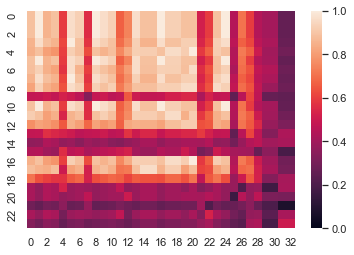

In [23]:
sns.heatmap(sdf, vmin=0)

In [24]:
pre_df = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-11-41-34/results1.csv')
pre_df = readable_to_df_list(pre_df, columns=['stocks'])

In [25]:
df = pd.read_csv('../exp/RPS/RPS_sp500_2021-Sep-21-11-41-34/results2.csv')
df = readable_to_df_list(df, columns=['stocks'])

In [26]:
pre_df

,stocks,weights,corr_min,corr_max,corr_mean,corr_std,return,sigma,sharpe,information,modigliani
0,"[AAPL, ACN, ADSK, AJG, AKAM, ALK, ALL, AME, AM...",0.0036566908012326403//0.022532309864649935//0...,"[0.0036566908012326403, 0.022532309864649935, ...",-0.988457,0.996161,0.391986,0.726171,0.247055,0.070916,3.358273,3.020966
1,"[ANTM, AVB, CAH, D, EBAY, FIS, GLW, ILMN, MGM,...",0.002448305543273585//0.048364283066079476//0....,"[0.002448305543273585, 0.048364283066079476, 0...",-0.724845,0.871821,0.099677,0.448102,-0.104749,0.106390,-1.068223,-1.289860
2,"[ABBV, ABC, ADBE, AES, AIV, AIZ, ALB, AMT, ANS...",0.0022985465980801694//0.006853959235159005//0...,"[0.0022985465980801694, 0.006853959235159005, ...",-0.947297,0.978456,0.042234,0.600396,0.093742,0.076354,1.111178,1.142350
3,"[BXP, HST, SRCL]",0.18876863349565812//0.3739834465206032//0.437...,"[0.18876863349565812, 0.3739834465206032, 0.43...",0.212499,0.748181,0.438292,0.248262,0.273318,0.142436,1.856398,3.342782
4,"[AEE, ALGN, AMD, APH, ATVI, AZO, BBY, CI, CL, ...",0.0238825208432864//0.0009065734255920511//0.0...,"[0.0238825208432864, 0.0009065734255920511, 0....",-0.861384,0.956482,0.071775,0.481514,0.010249,0.077257,0.017461,0.119264
5,"[ADP, ALLE, ALXN, BLL, BMY, CDNS, CINF, COTY, ...",0.04042986460586431//0.007160661905608142//0.0...,"[0.04042986460586431, 0.007160661905608142, 0....",-0.952462,0.961068,0.077592,0.413486,0.052880,0.082249,0.534722,0.641646
6,"[AEP, CHRW, COST, EXPD, HP]",0.5060538234112579//0.03690927466363857//0.354...,"[0.5060538234112579, 0.03690927466363857, 0.35...",-0.543831,0.824120,0.212741,0.371451,0.070194,0.093657,0.654458,0.853805
7,"[ABBV, AES, AIV, AIZ, AVGO, BAX, BDX, BK, CHD,...",0.007852811557912443//0.04258144795345786//0.0...,"[0.007852811557912443, 0.04258144795345786, 0....",-0.966800,0.972911,0.048896,0.678299,-0.024371,0.067083,-0.495961,-0.304949
8,"[BA, HST, MAA, WFC]",0.1414970378473217//0.3847630052167356//0.2069...,"[0.1414970378473217, 0.3847630052167356, 0.206...",0.077192,0.706805,0.428483,0.216425,-0.030684,0.095830,-0.413059,-0.382302
9,"[AAL, ABT, AMD, AMG, AOS, APA, ARE, ATVI, AWK,...",0.01622541912549854//0.003779682110013015//0.0...,"[0.01622541912549854, 0.003779682110013015, 0....",-0.861384,0.978163,0.065452,0.425987,-0.032039,0.078006,-0.524821,-0.398916


In [27]:
df

,stocks,weights,corr_min,corr_max,corr_mean,corr_std,return,sigma,sharpe,information,modigliani
0,"[CPB, CTSH, CXO, DISH, DLR, EL, KIM, KMX, MET,...",0.009800168409267717//0.008265850703490991//0....,"[0.009800168409267717, 0.008265850703490991, 0...",-0.557685,0.901453,0.149291,0.337422,0.015313,0.115101,0.055714,0.130720
1,"[AKAM, CB, COG, RSG, ULTA, XEL]",0.18267543647867324//0.3621470499063057//0.101...,"[0.18267543647867324, 0.3621470499063057, 0.10...",-0.287785,0.888795,0.247525,0.379863,-0.022421,0.112465,-0.278499,-0.137913
2,"[ADP, AIV, AKAM, ALLE, AMP, APD, ARNC, AVB, AX...",0.017736483978738924//0.00558654001739778//0.0...,"[0.017736483978738924, 0.00558654001739778, 0....",-0.927613,0.992028,0.274682,0.326248,-0.001157,0.103999,-0.096701,0.013471
3,"[ALK, ALL, CMCSA, DRI, EQR, HCA, IT, OKE, RE, ...",0.03125662807694609//0.17509922810353507//0.06...,"[0.03125662807694609, 0.17509922810353507, 0.0...",-0.654663,0.867276,0.324972,0.364878,-0.133848,0.103969,-1.372988,-0.931168
4,"[ADI, ALGN, AMGN, BEN, BWA, CI, CSX, DVN, EXC,...",0.002387879772575735//0.011483704861043015//0....,"[0.002387879772575735, 0.011483704861043015, 0...",-0.879731,0.952117,0.479508,0.521172,-0.419316,0.097018,-4.413778,-2.963448
5,"[AAL, AAPL, ADM, AMT, ANSS, BAC, BBY, BLK, C, ...",0.00045512983148310684//0.001861483289846317//...,"[0.00045512983148310684, 0.001861483289846317,...",-0.946861,0.992438,0.827329,0.396751,-0.394756,0.118320,-3.411572,-2.788601
6,"[AMD, CPB, HES, LEN, NSC, PLD]",0.16232276929214076//0.05272788834738036//0.01...,"[0.16232276929214076, 0.05272788834738036, 0.0...",-0.353177,0.865707,0.456503,0.414854,-0.342760,0.183107,-1.920512,-2.418436
7,"[AEE, AES, AFL, ALK, ALL, AMD, AON, CMCSA, COP...",0.026980389624453333//0.01398116480866709//0.0...,"[0.026980389624453333, 0.01398116480866709, 0....",-0.669406,0.923120,0.194565,0.400378,-0.021827,0.122341,-0.251159,-0.133681
8,"[AEP, APA, BA, BAX, BMY, BXP, CCI, CERN, CHRW,...",0.027194255572560815//0.002004318055175153//0....,"[0.027194255572560815, 0.002004318055175153, 0...",-0.870491,0.956409,0.146523,0.578399,-0.138181,0.118091,-1.245487,-0.962021
9,"[APD, AVB, CTAS, DHR, EFX, KMI, KMX, KO, L, LL...",0.0996875542598247//0.03277430657164582//0.023...,"[0.0996875542598247, 0.03277430657164582, 0.02...",-0.568768,0.938346,0.363708,0.344746,0.030428,0.122667,0.175498,0.238325


In [34]:
stability_df = pd.DataFrame(index=list(range(len(df))), columns=list(range(len(pre_df))), dtype=float)

for i in range(len(df)):
    for j in range(len(pre_df)):
        distance = calculate_noise_stability(
            set(df.loc[i, 'stocks']),
            set(pre_df.loc[j, 'stocks'])
        )
        stability_df.loc[i, j] = distance

In [38]:
stability_df.max().min()

0.021739130434782608

<AxesSubplot:>

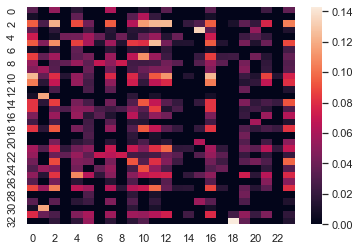

In [36]:
sns.heatmap(stability_df, vmin=0)